<a href="https://colab.research.google.com/github/guilleto/MetNumUN2024I/blob/main/lab2/gcorreac%20_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**LABORATORIO 2**
#INTEGRANTES:

Enlace colab:
`https://colab.research.google.com/drive/1dzeijDzXkxpjWeZEOZHANcGx_CIdcVfa?usp=sharing`

#Juan Felipe Pastran Ramirez
#Jeisson Duvan Bareño
#Guillermo Alberto Correa Cubillos

In [ ]:
!pip install -U fortran-magic

%matplotlib inline
%load_ext fortranmagic


import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00',
                             '2017-01-07 00:00:00+00:00',
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.3 MB/s eta 0:00:00


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [ ]:
# Lists can also be sliced, which makes a copy of elements between
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'David': 'Hume',
 'Immanuel': 'Kant',
 'Bertrand': 'Russell',
 'Ludwig': 'Wittgenstein'}

In [ ]:
del philosophers['David']
philosophers

KeyError: 'David'

In [ ]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: unhashable type: 'slice'

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
4 * "a"

'aaaa'

In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time

matmul(a, b)

CPU times: user 28 µs, sys: 0 ns, total: 28 µs
Wall time: 31.2 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 0 - cpu info**

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2200.150
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4400.30
clflush size	: 64
cache_alignment	: 64
addres

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out

# Matrices
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]



**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [ ]:
matmul(a,b)

IndexError: list index out of range

**My own example 3 - Chekcing the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    if(len(A[0]) == len(B)):
      for i in range(rows_out):
          for j in range(cols_out):
              for k in range(len(A[0])):
                  out[i][j] += A[i][k] * B[k][j]
    else:
      print("THE MATRIX COULDNT BE MULTIPLICATED")
      return
    return out

**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
%%time

matmul(a, b)

THE MATRIX COULDNT BE MULTIPLICATED
CPU times: user 78 µs, sys: 0 ns, total: 78 µs
Wall time: 82.3 µs


**My own example 5 - Deifining A and B that are compatible for multiplcation**

In [ ]:
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5],
     [3, 4, 5, 6]]

matmul(a,b)

[[14, 20, 26, 32], [20, 29, 38, 47], [38, 56, 74, 92], [6, 9, 12, 15]]

**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [ ]:
import random

In [ ]:
random.normalvariate(0,1)

-2.274781114541538

In [ ]:

def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.9379158465744292, 0.7130771163392146, 0.5215615753580432],
 [0.6913806011903232, 0.4224584662632983, 0.7349084814614243]]

In [ ]:
%%time
randA = random_matrix(3,4)
randB = random_matrix(4,2)
matmul (randA, randB)

CPU times: user 67 µs, sys: 10 µs, total: 77 µs
Wall time: 81.3 µs


[[0.13397105685999303, 0.39005968650226447],
 [0.6213519347985333, 0.6934455220625683],
 [0.6270485995370267, 1.2907285101606663]]

**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [ ]:
import time
def temporizador(operacion):

  promedio = 0
  for i in range (10):
    start = time.process_time()

    operacion()
    end = time.process_time()
    promedio += (end - start)
    print(i+1, ":",end - start)
  return (promedio/10)

In [ ]:
promedioPy = temporizador(lambda: matmul(random_matrix(600, 100), random_matrix(100, 600)))

print('Promedio', promedioPy)

1 : 8.309086490999988
2 : 10.49080603599998
3 : 9.640007456000006
4 : 9.166550053999998
5 : 8.845050385999997
6 : 8.465198449000013
7 : 9.158985047000016
8 : 9.258785572000022
9 : 8.222059589999986
10 : 9.32472052
Promedio 9.0881249601


**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [ ]:
import pandas as pd

tablaPromedios = pd.DataFrame({'lenguaje': [], "Tiempo promedio (s)": []})
def anadirDf(lenguaje, tiempo):
  global tablaPromedios
  tempDf = pd.DataFrame({'lenguaje': [lenguaje], "Tiempo promedio (s)": [tiempo]})
  tablaPromedios = pd.concat([tablaPromedios, tempDf], ignore_index = True)


anadirDf('Python', promedioPy)
display(tablaPromedios)

,lenguaje,Tiempo promedio (s)
0,Python,9.088125


**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [ ]:
import numpy as np

matA = np.random.rand(600, 100)
matB = np.random.rand(100, 600)


promedioNp = temporizador(lambda: np.matmul(matA, matB))





anadirDf('Numpy', promedioNp)
display(tablaPromedios)

1 : 0.00617414799998528
2 : 0.005327152000006663
3 : 0.010317710999999008
4 : 0.009405752000020584
5 : 0.007195942999999261
6 : 0.007665075999994997
7 : 0.006372018000007529
8 : 0.007384414000000561
9 : 0.007275582999994867
10 : 0.007376585999992358


,lenguaje,Tiempo promedio (s)
0,Python,9.088125
1,Numpy,0.007449


In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
%fortran_config --clean-cache

UsageError: Line magic function `%fortran_config` not found.


In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result

    result = sum(xs * ys)
end

The extension _fortran_magic_b3d08f8fc18581bec0b9e568ec5d6730 is already loaded. To reload it, use:
  %fortran_config --clean-cache


In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 17 ms, sys: 0 ns, total: 17 ms
Wall time: 21.4 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 197 µs, sys: 3 µs, total: 200 µs
Wall time: 209 µs


333328333350000.0

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [ ]:
#obtenido de chatGpt
%%fortran
subroutine matrices
  implicit none
  integer :: matriz1(2,2), matriz2(2,2)

  ! Definir la matriz 1
  matriz1 = reshape((/1, 2, 3, 4/), (/2, 2/))

  ! Definir la matriz 2
  matriz2 = reshape((/5, 6, 7, 8/), (/2, 2/))

  ! Imprimir las matrices
  print *, 'Matriz 1:'
  print *, matriz1(1,1), matriz1(1,2)
  print *, matriz1(2,1), matriz1(2,2)

  print *, 'Matriz 2:'
  print *, matriz2(1,1), matriz2(1,2)
  print *, matriz2(2,1), matriz2(2,2)
end



The extension _fortran_magic_d749bb2b0e8015718348250bd9109873 is already loaded. To reload it, use:
  %fortran_config --clean-cache


#o**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [ ]:
#obtenido de chatgpt
%%fortran
subroutine multiplicar_matrices(A, B, C)
  implicit none
  real(8) :: A(2,2), B(2,2), C(2,2)
  integer :: i, j, k

  do i = 1, 2
    do j = 1, 2
      C(i,j) = 0.0
      do k = 1, 2
        C(i,j) = C(i,j) + A(i,k) * B(k,j)
      end do
    end do
  end do

end subroutine multiplicar_matrices

The extension _fortran_magic_6117144f60a26dfee813a646adf848ec is already loaded. To reload it, use:
  %fortran_config --clean-cache


**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [ ]:
matA = random_matrix(2,2)
matB = random_matrix(2,2)
multiplicar_matrices(matA, matB, [[0,0],[0,0]])


**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [ ]:
#obtenido de chatgpt
%%fortran
subroutine multiplicar_matrices(A, B, C)
  implicit none
  real(8) :: A(600,100), B(100,600), C(600, 600)
  integer :: i, j, k

  do i = 1, 600
    do j = 1, 600
      C(i,j) = 0.0
      do k = 1, 100
        C(i,j) = C(i,j) + A(i,k) * B(k,j)
      end do
    end do
  end do

end subroutine multiplicar_matrices

The extension _fortran_magic_d5ff9cdc803edd77b1e64a18f427a532 is already loaded. To reload it, use:
  %fortran_config --clean-cache




```
# Esto tiene formato de código
```

**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [ ]:
multiplicar_matrices(random_matrix(600,100), random_matrix(100, 600), random_matrix(600, 600))


**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [ ]:
promedioFMagic = temporizador(lambda: multiplicar_matrices(random_matrix(600,100), random_matrix(100, 600), random_matrix(600, 600)))
anadirDf('Fortran magic', promedioFMagic)
display(tablaPromedios)

1 : 0.13275762600000007
2 : 0.136907640000004
3 : 0.12576597199998218
4 : 0.12858426799999734
5 : 0.13059166299998992
6 : 0.12731121799998846
7 : 0.13086439200000655
8 : 0.12937781399998016
9 : 0.1214866299999926
10 : 0.15084744000000683


,lenguaje,Tiempo promedio (s)
0,Python,9.088125
1,Numpy,0.007449
2,Fortran magic,0.131449


**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile main.f90


program main
    implicit none
    integer, parameter :: af = 600, ac = 100, bf = 100, bc = 600
    real :: A(af, ac), B(bf, bc), C(af, bc)
    real :: total_time, start_time, end_time
    integer :: i, j, k, n, num_executions
    real :: time_array(10)

    ! Inicializar matrices A y B con valores aleatorios
    call fillMatrix(af, ac, A)
    call fillMatrix(bf, bc, B)

    num_executions = 10
    total_time = 0.0

    do n = 1, num_executions
        call cpu_time(start_time)

        ! Multiplicar las matrices A y B
        call multiplyMatrix(af, ac, bf, bc, A, B, C)

        call cpu_time(end_time)
        time_array(n) = real(end_time - start_time)/real(1000)
    end do

    total_time = sum(time_array) / real(num_executions)
    print *, total_time

contains

    subroutine fillMatrix(rows, cols, matrix)
        integer, intent(in) :: rows, cols
        real, intent(inout) :: matrix(rows, cols)
        integer :: i, j

        call random_number(matrix)
    end subroutine fillMatrix

    subroutine multiplyMatrix(af, ac, bf, bc, A, B, finalMatrix)
        integer, intent(in) :: af, ac, bf, bc
        real, intent(in) :: A(af, ac), B(bf, bc)
        real, intent(out) :: finalMatrix(af, bc)
        integer :: i, j, k

        finalMatrix = 0.0
        do i = 1, af
            do j = 1, bc
                do k = 1, ac
                    finalMatrix(i, j) = finalMatrix(i, j) + A(i, k) * B(k, j)
                end do
            end do
        end do
    end subroutine multiplyMatrix

end program main

Overwriting main.f90


**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!gfortran main.f90 -o main


promedioFortran = !./main
promedioFortran = float(promedioFortran[0])
print(promedioFortran)

0.000182432501


**My own example 18 - Adding Fortran average execution time to the data frame**

In [ ]:
anadirDf("Fortran", promedioFortran)
display(tablaPromedios)

,lenguaje,Tiempo promedio (s)
0,Python,9.088125
1,Numpy,0.007449
2,Fortran magic,0.131449
3,Fortran,0.000182


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile metnum.c
#include <stdio.h>
#include <stdlib.h>
#include <time.h>

void fillMatrix(int rows, int cols, int matrix[rows][cols]) {
    srand(time(NULL));
    for (int i = 0; i < rows; i++) {
        for (int j = 0; j < cols; j++) {
            matrix[i][j] = rand() % 10; // Llenar la matriz con valores aleatorios entre 0 y 9
        }
    }
}

void multiplyMatrix(int af, int ac, int bf, int bc, int A[af][ac], int B[bf][bc], int finalMatrix[af][bc]) {
    for (int i = 0; i < af; i++) {
        for (int j = 0; j < bc; j++) {
            finalMatrix[i][j] = 0;
            for (int k = 0; k < ac; k++) {
                finalMatrix[i][j] += A[i][k] * B[k][j];
            }
        }
    }
}

int main() {
    const int af = 600;
    const int ac = 100;
    const int bf = 100;
    const int bc = 600;

    int A[af][ac];
    int B[bf][bc];
    int C[af][bc];

    fillMatrix(af, ac, A);
    fillMatrix(bf, bc, B);

    clock_t totalTime = 0;

    for (int i = 0; i < 10; i++) {
        clock_t startTime = clock();
        multiplyMatrix(af, ac, bf, bc, A, B, C);
        clock_t endTime = clock();
        totalTime += endTime - startTime;
    }

    double averageTime = (double)totalTime / (CLOCKS_PER_SEC * 10);
    printf("%f", averageTime);

    return 0;
}

Overwriting metnum.c


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
promedioC = !gcc metnum.c && ./a.out

promedioC = float(promedioC[0])
print(promedioC)

0.206153


**My own example 21 - Adding c average execution time to the data frame**

In [ ]:
anadirDf("C", promedioC)
display(tablaPromedios)

,lenguaje,Tiempo promedio (s)
0,Python,9.088125
1,Numpy,0.007449
2,Fortran magic,0.131449
3,Fortran,0.000182
4,C,0.206153


**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile main.cpp
#include <iostream>
#include <chrono>

using namespace std;
using namespace std::chrono;


const int filas_A = 600;
const int columnas_A = 100;
const int columnas_B = 600;

void multiplicarMatrices(int A[filas_A][columnas_A], int B[columnas_A][columnas_B], int resultado[filas_A][columnas_B]) {
    for (int i = 0; i < filas_A; ++i) {
        for (int j = 0; j < columnas_B; ++j) {
            resultado[i][j] = 0;
            for (int k = 0; k < columnas_A; ++k) {
                resultado[i][j] += A[i][k] * B[k][j];
            }
        }
    }
}

int main() {
    int A[filas_A][columnas_A];
    int B[columnas_A][columnas_B];
    int resultado[filas_A][columnas_B];
    double promedio = 0;
    // Llenar las matrices A y B con valores aleatorios
    srand(time(0));
    for (int i = 0; i < filas_A; ++i) {
        for (int j = 0; j < columnas_A; ++j) {
            A[i][j] = rand() % 100;
        }
    }
    for (int i = 0; i < columnas_A; ++i) {
        for (int j = 0; j < columnas_B; ++j) {
            B[i][j] = rand() % 100;
        }
    }

    // Multiplicar las matrices A y B 10 veces
    for (int i = 0; i < 10; ++i) {
        auto t0 = std::chrono::high_resolution_clock::now();
        multiplicarMatrices(A, B, resultado);
        auto t1 = std::chrono::high_resolution_clock::now();


        std::chrono::duration< double > duracion = t1 - t0;
        promedio += (double)duracion.count();
    }
    promedio = promedio/10;
    cout << promedio;



    // Mostrar el resultado de la última multiplicación
    //*
    //std::cout << "Resultado de la última multiplicación:" << std::endl;
    //for (int i = 0; i < filas_A; ++i) {
    //    for (int j = 0; j < columnas_B; ++j) {
     //       std::cout << resultado[i][j] << " ";
      //  }
       // std::cout << std::endl;
    //}


    return 0;
}

Overwriting main.cpp


%%**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
promedioCmas = !g++ main.cpp && ./a.out
promedioCmas = float(promedioCmas[0])
print(promedioCmas)

0.173811


**My own example 24 - Adding C++ average execution time to the data frame**

In [ ]:
anadirDf("C++", promedioCmas)
display(tablaPromedios)

,lenguaje,Tiempo promedio (s)
0,Python,9.088125
1,Numpy,0.007449
2,Fortran magic,0.131449
3,Fortran,0.000182
4,C,0.206153
5,C++,0.173811


**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile main.java

import java.util.Random;
import java.io.File;
import java.io.FileWriter;
import java.io.IOException;
//CODIGO HECHO POR EL GRUPO
public class App {

    static Random rand = new Random();
    public static void main(String[] args) throws Exception {
        double[][] matA = generarMatriz(600, 100);
        double[][] matB = generarMatriz(100, 600);
        double[][] resultadoMultiplicacion;

        //EJECUTAMOS 10 VECES
        double promedio = 0;
        for (int i = 0; i < 10; i++) {
            double start = System.currentTimeMillis();
            resultadoMultiplicacion = multiplicarMatrices(matA, matB);
            double end = System.currentTimeMillis();
            promedio += (end - start);

        }
        promedio = promedio / 10000; //se divide en 10000, seria igual que dividir en 1000 (pasar de milisegundos a segundos) y luego en 10 para obtener el promedio
        System.out.println(promedio);


    }



    public static double[][] generarMatriz(int n, int m) {
        double[][] matriz = new double[n][m];
        for (int i = 0; i < n; i++) {
            for (int j = 0; j < m; j++){
                matriz[i][j] = rand.nextDouble();
            }
        }
        return matriz;
    }

    public static double[][] multiplicarMatrices(double[][] matA, double[][] matB) {
        int n = matA.length;
        int m = matB[0].length;
        int o = matB.length;
        double[][] resultado = new double[n][m];
        for (int i = 0; i < n; i++) {
            for (int j = 0; j < m; j++){
                for (int k = 0; k < o; k++) {
                    resultado[i][j] += matA[i][k] * matB[k][j];
                }
            }
        }
        return resultado;
    }
}


Overwriting main.java


**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
promedioJava = !java /content/main.java
promedioJava = float(promedioJava[0])
print(promedioJava)

0.2722


**My own example 27 - Adding Java average execution time to the data frame**

In [ ]:
anadirDf("Java", promedioJava)

display(tablaPromedios)

,lenguaje,Tiempo promedio (s)
0,Python,9.088125
1,Numpy,0.007449
2,Fortran magic,0.131449
3,Fortran,0.000182
4,C,0.206153
5,C++,0.173811
6,Java,0.272200


**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:

%%writefile tmp.js


function FillMatrix(rows, cols) {
    const matrix = new Array(rows);
    for (let i = 0; i < rows; i++) {
        matrix[i] = new Array(cols);
        for (let j = 0; j < cols; j++) {
            matrix[i][j] = Math.floor(Math.random() * (i + j + 1));
        }
    }
    return matrix;
}

function multiplyMatrix(A,af,bc,bf, B, finalMatrix) {
    for (let i = 0; i < af; i++) {
        for (let j = 0; j < bc; j++) {
            finalMatrix[i][j] = 0.0;
            for (let k = 0; k < bf; k++) {
                finalMatrix[i][j] += A[i][k] * B[k][j];
            }
        }
    }
}

function printMatrix(matrix) {
    for (let i = 0; i < matrix.length; i++) {
        let row = "";
        for (let j = 0; j < matrix[i].length; j++) {
            row += matrix[i][j] + "\t";
        }
        console.log(row);
    }
}
function guardarPromedio(promedio) {
  var blob = new Blob([promedio], {type: "text/plain;charset=utf-8",});
         saveAs(blob, "PromedioJs.txt");
}
function main() {
    //console.log("Iniciando función principal...");
    const af = 600;
    const ac = 100;
    const bf = 100;
    const bc = 600;
    const C = new Array(af).fill(null).map(() => new Array(bc));

    let totalTime = 0;

    const A = FillMatrix(af, ac);
    const B = FillMatrix(bf, bc);

    for (let i = 0; i < 10; i++) {
        const startTime = Date.now();
        multiplyMatrix(A,af,bc,bf, B, C);
        const endTime = Date.now();
        totalTime += endTime - startTime;
    }

    const averageTime = totalTime / 10;

    console.log((averageTime / 1000).toString())
    // printMatrix(C);
}
main();

Overwriting tmp.js


**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
promedioJs = !node /content/tmp.js
promedioJs = float(promedioJs[0])
print(promedioJs)

0.2995


**My own example 30 - Adding Javascript average execution time to the data frame**

In [ ]:
anadirDf("Javascript", promedioJs)

display(tablaPromedios)

,lenguaje,Tiempo promedio (s)
0,Python,9.088125
1,Numpy,0.007449
2,Fortran magic,0.131449
3,Fortran,0.000182
4,C,0.206153
5,C++,0.173811
6,Java,0.272200
7,Javascript,0.299500


**My own example 31 - Finding the minimun average esecuiton time in the data frame**

In [ ]:
promedioMinimo=min(tablaPromedios["Tiempo promedio (s)"])
print(promedioMinimo)

0.000182432501


**My own example 32 - Adding the Speed factor columne to the data frame**

In [ ]:
tablaPromedios["Speed factor"]=tablaPromedios["Tiempo promedio (s)"]/promedioMinimo

**My own example 33 - Sorting the the data frame by average execution time**

In [ ]:
tablaPromedios.sort_values(by=["Tiempo promedio (s)"], inplace=True)
tablaPromedios


,lenguaje,Tiempo promedio (s),Speed factor
3,Fortran,0.000182,1.000000
1,Numpy,0.007449,40.833943
2,Fortran magic,0.131449,720.537544
5,C++,0.173811,952.741420
4,C,0.206153,1130.023427
6,Java,0.272200,1492.058698
7,Javascript,0.299500,1641.703087
0,Python,9.088125,49816.369947


## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [ ]:
data + data

array([2, 4, 6, 8])

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 408 µs


333328333350000.0

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 162 µs


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 313 µs


333328333350000.0

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: invalid literal for int() with base 10: 'foo'

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [ ]:
# Unary functions.
np.sqrt(data)

array([[ 0.        ,  1.        ,  1.41421356,  1.73205081,  2.        ],
       [ 2.23606798,  2.44948974,  2.64575131,  2.82842712,  3.        ],
       [ 3.16227766,  3.31662479,  3.46410162,  3.60555128,  3.74165739]])

In [ ]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]], dtype=bool)

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]], dtype=bool)

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([ 0.        ,  0.34185385,  0.64251645,  0.86575984,  0.98468459,
        0.98496101,  0.8665558 ,  0.64373604,  0.34335012,  0.00159265])

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [ ]:
sines[:3]  # First three elements

array([ 0.        ,  0.34185385,  0.64251645])

In [ ]:
sines[5:]  # Elements from 5 on.

array([ 0.98496101,  0.8665558 ,  0.64373604,  0.34335012,  0.00159265])

In [ ]:
sines[::2]  # Every other element.

array([ 0.        ,  0.64251645,  0.98468459,  0.8665558 ,  0.34335012])

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [ 0.          0.34185385  0.64251645  0.86575984  0.98468459  0.98496101
  0.8665558   0.64373604  0.34335012  0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [ 0.64251645  0.86575984  0.98468459  0.98496101  0.8665558   0.64373604]


In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[ 0.          0.34185385  0.64251645  0.86575984  0.98468459  0.98496101
  0.8665558   0.64373604  0.34335012  0.00159265]


array([ 0.        ,  0.98468459,  0.64373604])

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [ ]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'],
      dtype='<U1')

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31', '2017-02-01'], dtype='datetime64[D]')


In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

1.0638195544963331

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

14.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [ ]:
data.mean()

14.5

In [ ]:
data.mean(axis=0)

array([ 10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.])

In [ ]:
data.mean(axis=1)

array([  4.5,  14.5,  24.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [ ]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[ 10.  11.  12.  13.  14.  15.  16.  17.  18.  19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for:
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [ ]:
# ... or by label.
s.loc['a']

1

In [ ]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [ ]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [ ]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100.0
2010-02-02,27.980000,174585600.0
2010-02-03,28.461428,153832000.0
2010-02-04,27.435715,189413000.0


# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

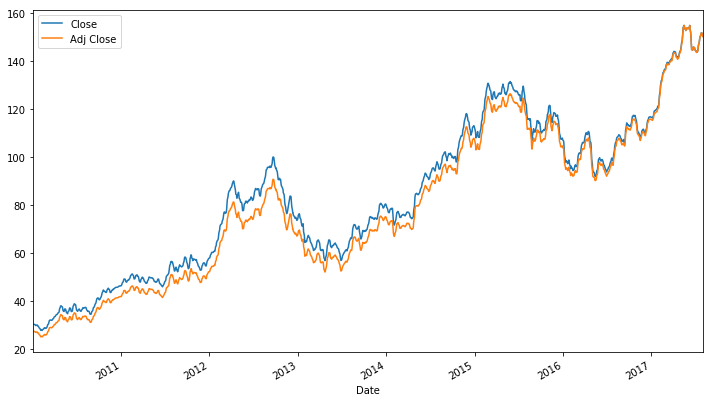

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

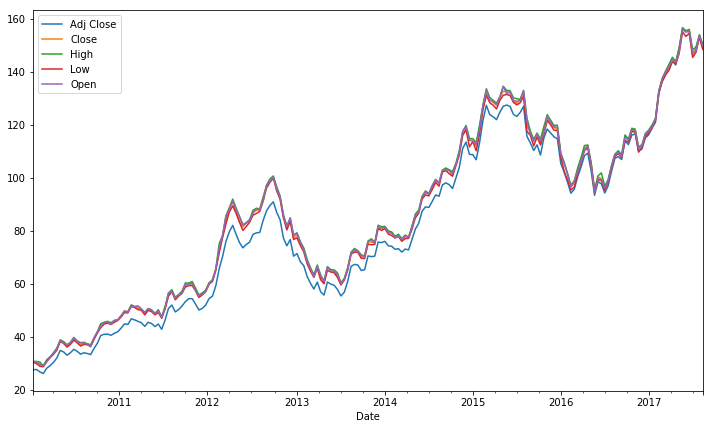

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

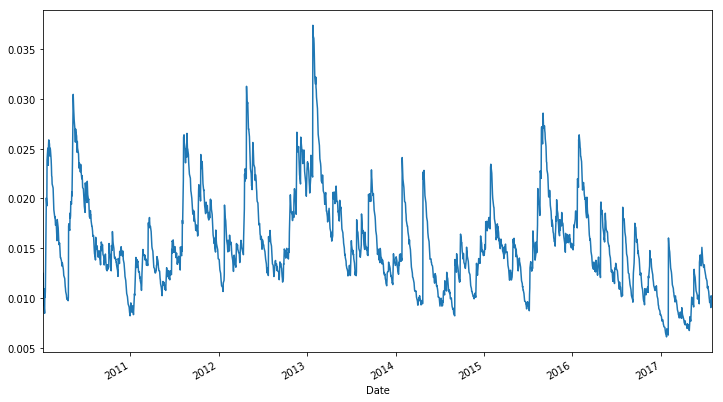

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [ ]:
from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

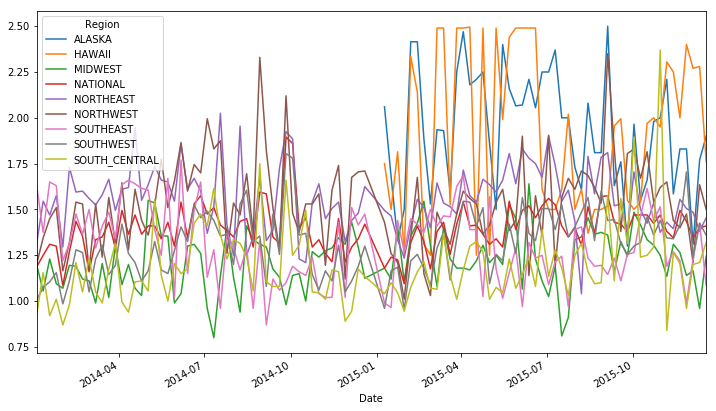

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)

    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

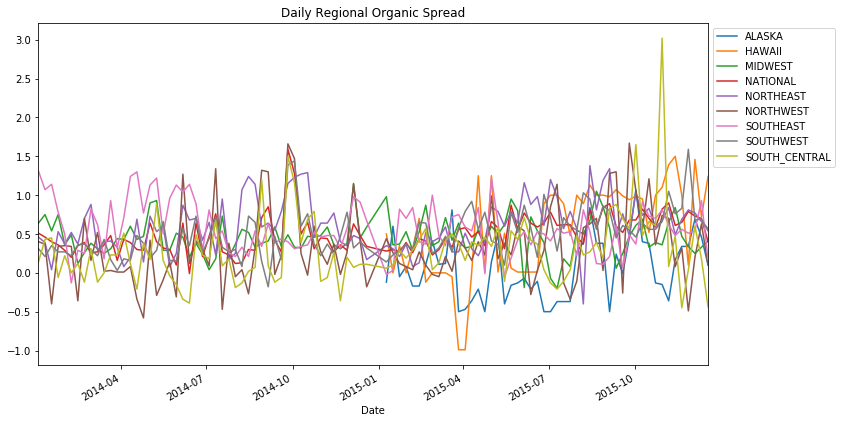

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


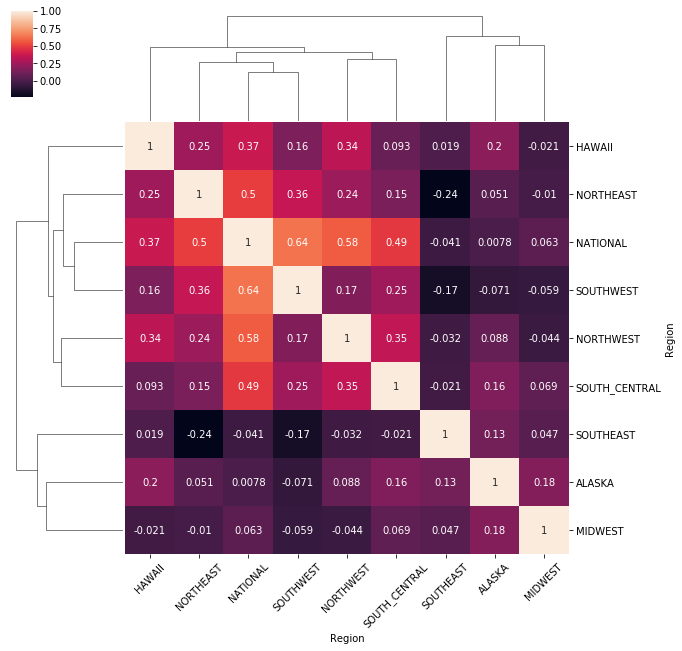

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!

# **DATOS COLOMBIA**

# Analisis de datos de precios de medicamentos, tomado de [Clicsalud - Termómetro de Precios de Medicamentos](https://www.datos.gov.co/Salud-y-Protecci-n-Social/Clicsalud-Term-metro-de-Precios-de-Medicamentos/n4dj-8r7k/about_data) #

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
#importado de https://www.datos.gov.co/Salud-y-Protecci-n-Social/Clicsalud-Term-metro-de-Precios-de-Medicamentos/n4dj-8r7k/about_data
#datos abiertos del gobierno nacional sobre el precio de medicamentos

medicamentos = pd.read_csv('Clicsalud_-_Term_metro_de_Precios_de_Medicamentos_20240228.csv')
medicamentos["precio_por_tableta"] = medicamentos["precio_por_tableta"].str.replace(',', '', regex=False).astype(float)
medicamentos.head()

,Expediente_INVIMA,principio_activo,concentracion,unidad_base,unidad_de_dispensacion,nombre_comercial,fabricante,medicamento,canal,precio_por_tableta,factoresprecio,numerofactor
0,104739,acido valproico,acido valproico 500 mg,mg,Tableta o cápsula,Valcote,Lafrancol,Valcote (Lafrancol) - Cada tableta contiene: a...,Comercial,3490.33,Medio,2
1,10815,fluoxetina,fluoxetina 20 mg,mg,Tableta o cápsula,Fluoxetina,Genfar,Fluoxetina (Genfar) - Cada capsula contiene: f...,Comercial,363.13,Medio,2
2,111057,proximetacaina,proximetacaina 5 mg,ml,Solución o suspensión oftálmica,Alcaine,Alcon,Alcaine (Alcon) - frasco 15 ml - Cada 1 ml con...,Comercial,57433.33,Medio,2
3,11415,alopurinol,alopurinol 300 mg,mg,Tableta o cápsula,Alopurinol,Memphis,Alopurinol (Memphis) - Cada tableta contiene: ...,Comercial,365.08,Medio,2
4,11416,haloperidol,haloperidol 10 mg,mg,Tableta o cápsula,Haloperidol,Memphis,Haloperidol (Memphis) - Cada tableta contiene:...,Comercial,533.81,Alto,3


BUSCAMOS LA CANTIDAD DE MEDICAMENTOS POR UNIDAD DE DISPENSACIÓN


In [ ]:
cantidad = medicamentos.groupby(["unidad_de_dispensacion"]).size()
cantidad
dfCantidad = (cantidad.reset_index())
dfCantidad.columns = ["unidad_de_dispensacion", "Cantidad"]
dfCantidad

,unidad_de_dispensacion,Cantidad
0,Aerosoles,37
1,Cremas o geles o ungüentos o pomadas o pastas ...,638
2,Elixir o tintura,6
3,Emulsión Oral,2
4,Emulsión Topica,36
5,Emulsión inyectable,46
6,Emulsión oftálmica,5
7,Gas,32
8,Implante,21
9,Jabón,6


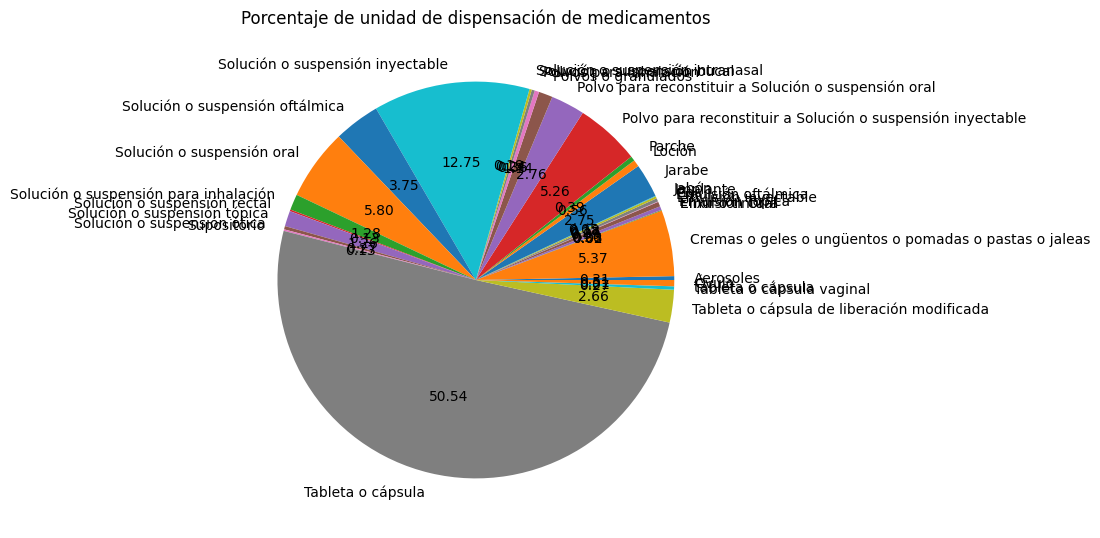

In [ ]:

plt.figure().set_figheight(20)
plt.pie(cantidad, labels = dfCantidad['unidad_de_dispensacion'].tolist(),  autopct='%.2f')

plt.title('Porcentaje de unidad de dispensación de medicamentos')

plt.show()

PRECIO PROMEDIO DE MEDICAMENTOS

In [ ]:
precio = medicamentos.groupby("unidad_de_dispensacion")["precio_por_tableta"].mean()
dfPrecio = (precio.reset_index())
dfPrecio.columns = ["unidad_de_dispensacion", "Precio promedio"]
dfPrecio

,unidad_de_dispensacion,Precio promedio
0,Aerosoles,58494.348108
1,Cremas o geles o ungüentos o pomadas o pastas ...,27230.737226
2,Elixir o tintura,11360.916667
3,Emulsión Oral,578997.500000
4,Emulsión Topica,42712.038611
5,Emulsión inyectable,159195.770217
6,Emulsión oftálmica,25751.258000
7,Gas,828779.356563
8,Implante,564711.194286
9,Jabón,75360.478333


<BarContainer object of 32 artists>

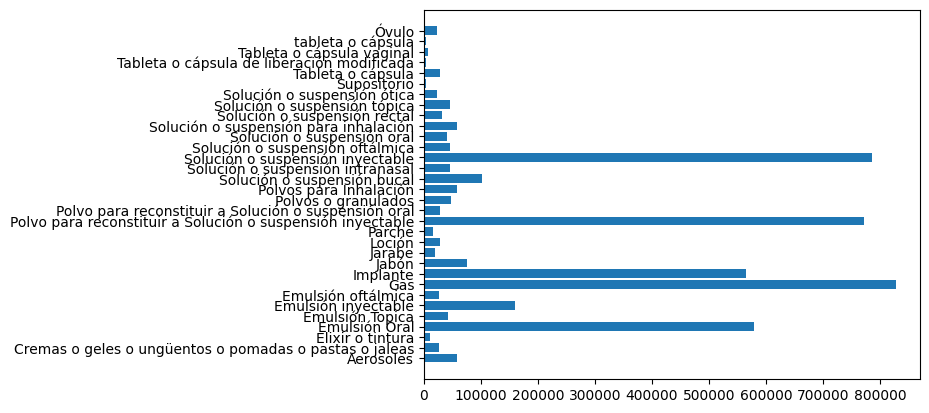

In [ ]:
plt.barh(dfPrecio["unidad_de_dispensacion"], dfPrecio["Precio promedio"])

Los 10 medicamentos más caros

In [ ]:

cantidadMed = medicamentos.groupby("principio_activo")["precio_por_tableta"].mean()
pd.set_option('display.float_format', lambda x: '%0.4f' % x)

dfcantidadMed = (cantidadMed.reset_index())
dfcantidadMed.columns = ["principio_activo", "Precio por tableta"]
dfcantidadMed.sort_values(by=['Precio por tableta'], ascending=False, inplace=True)
dfcantidadMed

,principio_activo,Precio por tableta
1338,nusinersen,248408868.0000
1714,treprostinil,48918016.7750
1440,polatuzumab vedotina,40574097.0000
1541,satralizumab,28343280.0000
1087,lanadelumab,26740738.0000
...,...,...
1665,tiamazol,68.0900
615,dipiridamol,67.0000
607,dinitrato de isosorbide,66.8000
1317,nimodipino,65.0000


<BarContainer object of 10 artists>

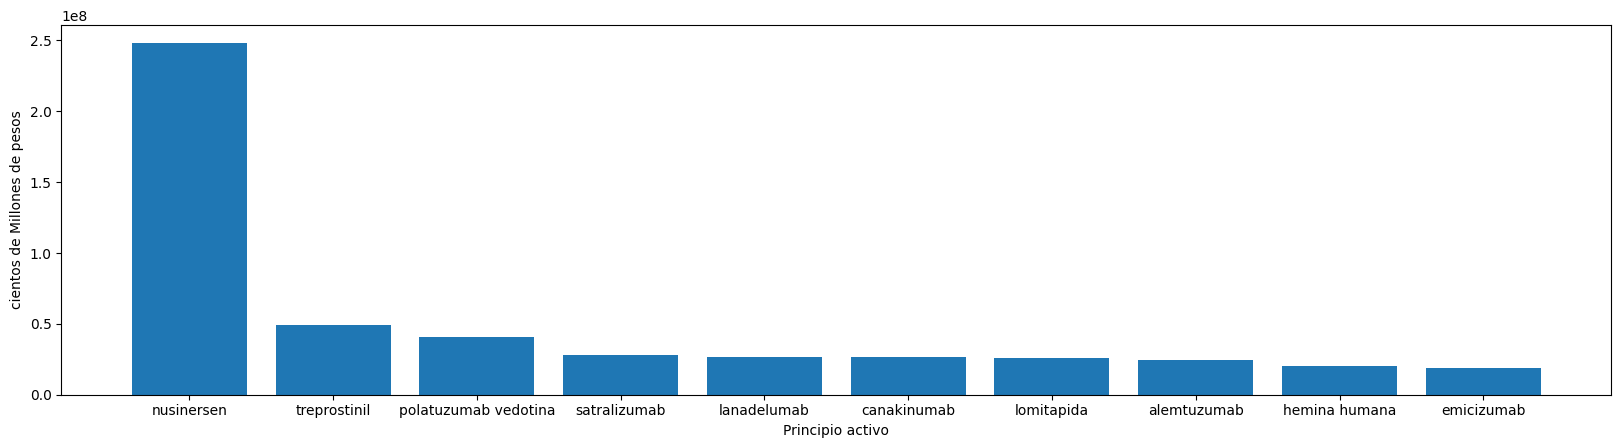

In [ ]:
dfCantidadMed10 = dfcantidadMed.head(10)
plt.figure().set_figwidth(20)
plt.xlabel("Principio activo")
plt.ylabel("cientos de Millones de pesos")
plt.bar(dfCantidadMed10["principio_activo"], dfCantidadMed10["Precio por tableta"])